<a href="https://colab.research.google.com/github/ShubhamSaini01/Kaggle/blob/main/DogVsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #mounting drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf #libraries
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "gaurangpendharkar" # username from the json file
os.environ['KAGGLE_KEY'] = "da6c2facfd02e351199bfc52b9a22f32" # key from the json file

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.12

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
  Using cached kaggle-1.5.12-py3-none-any.whl


In [ ]:
!kaggle competitions download -c dogs-vs-cats -p /content/gdrive/MyDrive/Kaggle/Zip

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/gdrive/MyDrive/Kaggle/Zip/dogs-vs-cats.zip -d /content/gdrive/MyDrive/Kaggle/Dog_Cat

Archive:  /content/gdrive/MyDrive/Kaggle/Zip/dogs-vs-cats.zip
replace /content/gdrive/MyDrive/Kaggle/Dog_Cat/sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/gdrive/MyDrive/Kaggle/Dog_Cat/sampleSubmission.csv  
  inflating: /content/gdrive/MyDrive/Kaggle/Dog_Cat/test1.zip  
  inflating: /content/gdrive/MyDrive/Kaggle/Dog_Cat/train.zip  


In [ ]:
!unzip /content/gdrive/MyDrive/Kaggle/Dog_Cat/train.zip -d /content/gdrive/MyDrive/Kaggle/Dog_Cat
#!unzip /content/gdrive/MyDrive/Kaggle/Dog_Cat/test1.zip -d /content/gdrive/MyDrive/Kaggle/Dog_Cat

In [ ]:
import shutil
for x in range(0,12500): #Moving files into a Cat folder
  file = "/content/gdrive/MyDrive/Kaggle/Dog_Cat/train/cat."+str(x)+".jpg"
  shutil.move(file, "/content/gdrive/MyDrive/Kaggle/Dog_Cat/train/Cat")


In [9]:
!pip install split-folders

In [14]:
import splitfolders
splitfolders.ratio("/content/gdrive/MyDrive/Kaggle/Dog_Cat/train", output="/content/gdrive/MyDrive/Kaggle/Dog_Cat/Split", seed=1338, ratio=(.8, .2), group_prefix=None)

Streaming output truncated to the last 5000 lines.
Copying files: 23279 files [1:29:16,  3.85 files/s]


Copying files: 23280 files [1:29:16,  4.31 files/s]


Copying files: 23281 files [1:29:16,  4.49 files/s]


Copying files: 23282 files [1:29:17,  4.30 files/s]


Copying files: 23283 files [1:29:17,  4.59 files/s]


Copying files: 23284 files [1:29:17,  4.08 files/s]


Copying files: 23285 files [1:29:17,  3.86 files/s]


Copying files: 23286 files [1:29:18,  4.12 files/s]


Copying files: 23287 files [1:29:18,  4.47 files/s]


Copying files: 23288 files [1:29:18,  4.73 files/s]


Copying files: 23289 files [1:29:18,  4.62 files/s]


Copying files: 23290 files [1:29:18,  4.20 files/s]


Copying files: 23291 files [1:29:19,  4.39 files/s]


Copying files: 23292 files [1:29:19,  4.08 files/s]


Copying files: 23293 files [1:29:19,  4.38 files/s]


Copying files: 23294 files [1:29:19,  4.58 files/s]


Copying files: 23295 files [1:29:20,  4.30 files/s]


Copying files: 23296 files [1:2

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255, #applying transformations
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Kaggle/Dog_Cat/Split/train', #training set
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 )
validation_datagen = ImageDataGenerator(rescale = 1./255, #creating a separate datagen for validation to prevent image augmentation
                                   )
validation_set = validation_datagen.flow_from_directory('/content/gdrive/MyDrive/Kaggle/Dog_Cat/Split/val', #validation set
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Kaggle/Dog_Cat/test1',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 0 images belonging to 0 classes.


In [17]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 25)

Epoch 1/25
625/625 [==============================] - 101s 160ms/step - loss: 0.6301 - accuracy: 0.6371 - val_loss: 0.5351 - val_accuracy: 0.7350
Epoch 2/25
625/625 [==============================] - 99s 159ms/step - loss: 0.5380 - accuracy: 0.7259 - val_loss: 0.4734 - val_accuracy: 0.7678
Epoch 3/25
625/625 [==============================] - 100s 160ms/step - loss: 0.4897 - accuracy: 0.7642 - val_loss: 0.4460 - val_accuracy: 0.7916
Epoch 4/25
625/625 [==============================] - 99s 159ms/step - loss: 0.4548 - accuracy: 0.7812 - val_loss: 0.4384 - val_accuracy: 0.7916
Epoch 5/25
625/625 [==============================] - 99s 159ms/step - loss: 0.4356 - accuracy: 0.7981 - val_loss: 0.4241 - val_accuracy: 0.8074
Epoch 6/25
625/625 [==============================] - 100s 159ms/step - loss: 0.4158 - accuracy: 0.8097 - val_loss: 0.4276 - val_accuracy: 0.8034
Epoch 7/25
625/625 [==============================] - 99s 159ms/step - loss: 0.3986 - accuracy: 0.8177 - val_loss: 0.3950 - val

In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


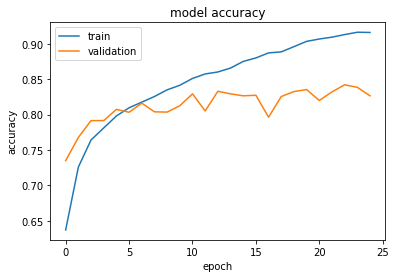

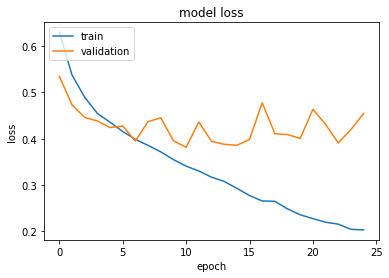

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()